In [5]:
import numpy as np

results = np.load("/home/vhsingh/openfoam10-run/Geo-UPSplus/dataset_gen/CE-CRP_openfoam/CE-CRP_results.npy")

print(results.shape)

(717, 21, 4, 128, 128)


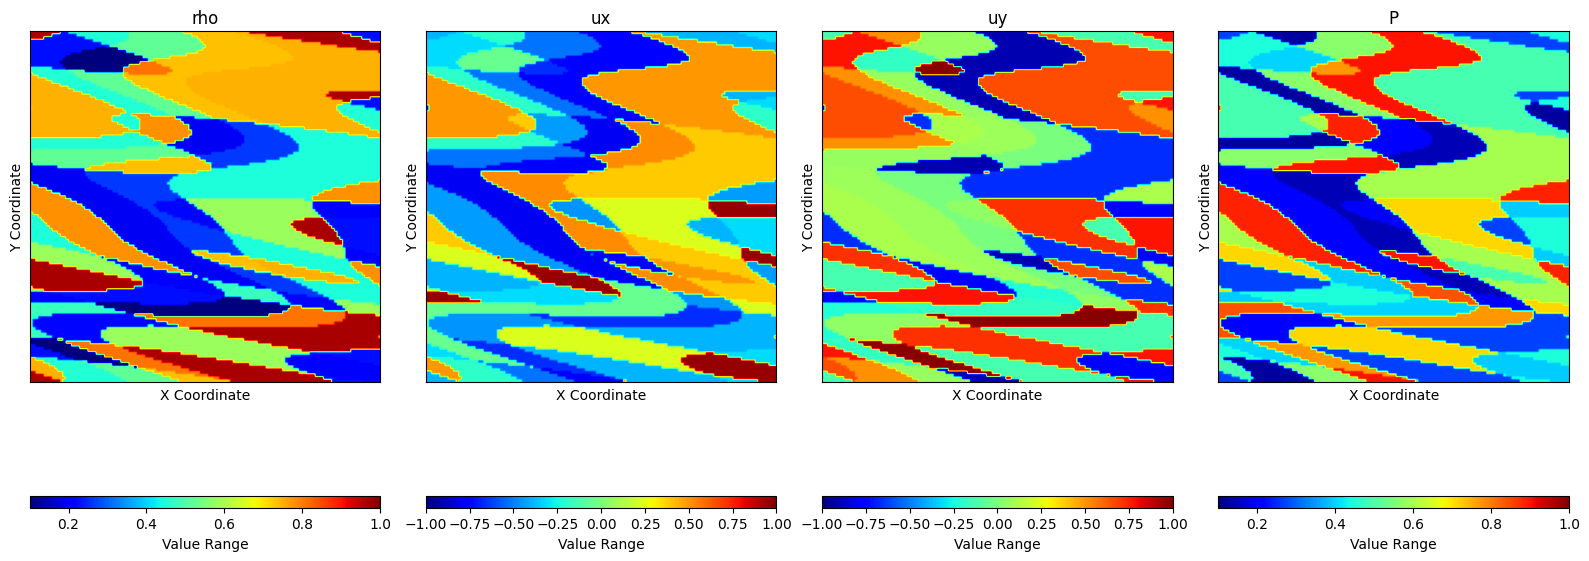

In [6]:
import matplotlib.pyplot as plt

# Extract the data for the first simulation and first timestep
data = results[0, 0, :, :, :]  # Shape: (4, 128, 128), where 4 is the number of channels

# Names and ranges for the plots
channel_info = [
    ('rho', 0.1, 1),
    ('ux', -1.0, 1.0),
    ('uy', -1.0, 1.0),
    ('P', 0.1, 1.0)
]

# Create the figure
fig, axes = plt.subplots(1, len(channel_info), figsize=(16, 6))

# Choose a more vibrant, multi-hued colormap (e.g., 'jet', 'hsv', 'turbo', 'prism')
cmap_choice = 'jet'

# Loop through each channel and create plots
for i, (name, vmin, vmax) in enumerate(channel_info):
    ax = axes[i]

    # Plot the heatmap with the chosen colormap
    im = ax.imshow(data[i, :, :], cmap=cmap_choice, origin='lower', vmin=vmin, vmax=vmax)
    ax.set_title(name)
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    # Add a colorbar below the plot
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.2, aspect=30)
    cbar.set_label('Value Range')

# Adjust layout
plt.tight_layout()
plt.show()


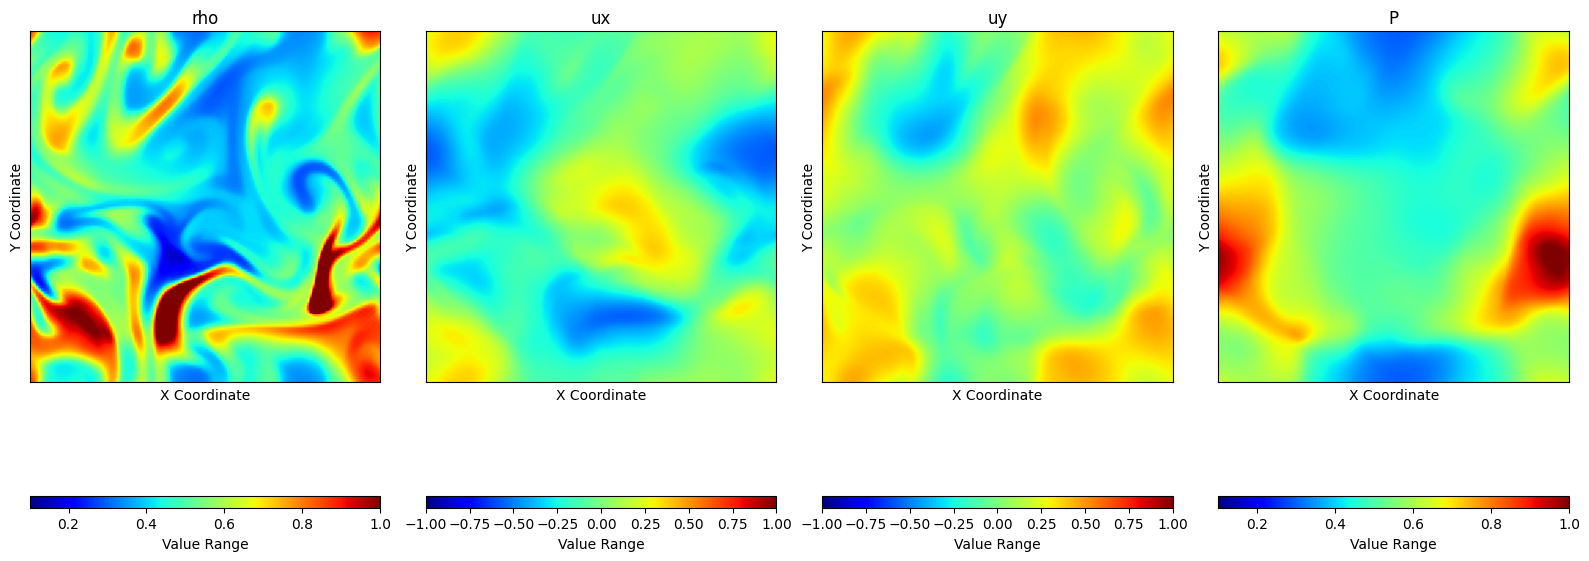

In [7]:
import matplotlib.pyplot as plt

# Extract the data for the first simulation and first timestep
data = results[0, 20, :, :, :]  # Shape: (4, 128, 128), where 4 is the number of channels

# Names and ranges for the plots
channel_info = [
    ('rho', 0.1, 1),
    ('ux', -1.0, 1.0),
    ('uy', -1.0, 1.0),
    ('P', 0.1, 1.0)
]

# Create the figure
fig, axes = plt.subplots(1, len(channel_info), figsize=(16, 6))

# Choose a more vibrant, multi-hued colormap (e.g., 'jet', 'hsv', 'turbo', 'prism')
cmap_choice = 'jet'

# Loop through each channel and create plots
for i, (name, vmin, vmax) in enumerate(channel_info):
    ax = axes[i]

    # Plot the heatmap with the chosen colormap
    im = ax.imshow(data[i, :, :], cmap=cmap_choice, origin='lower', vmin=vmin, vmax=vmax)
    ax.set_title(name)
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    # Add a colorbar below the plot
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.2, aspect=30)
    cbar.set_label('Value Range')

# Adjust layout
plt.tight_layout()
plt.show()


In [9]:
print(data.shape)

(4, 128, 128)


Done 0


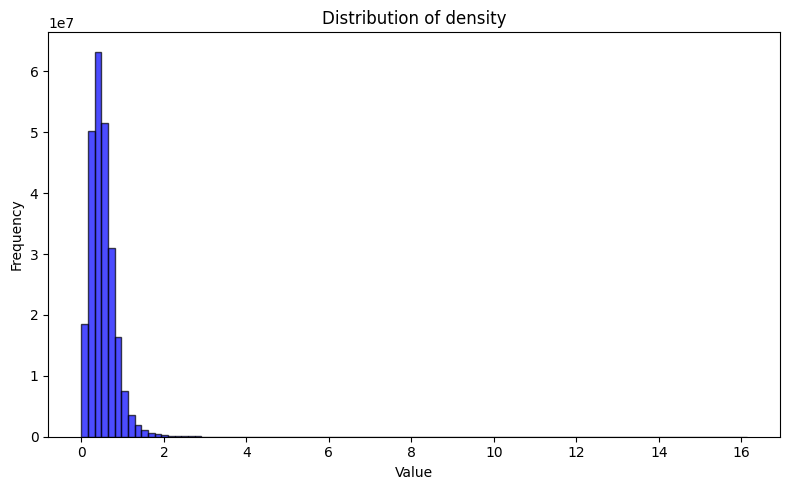

Done density
Done 1


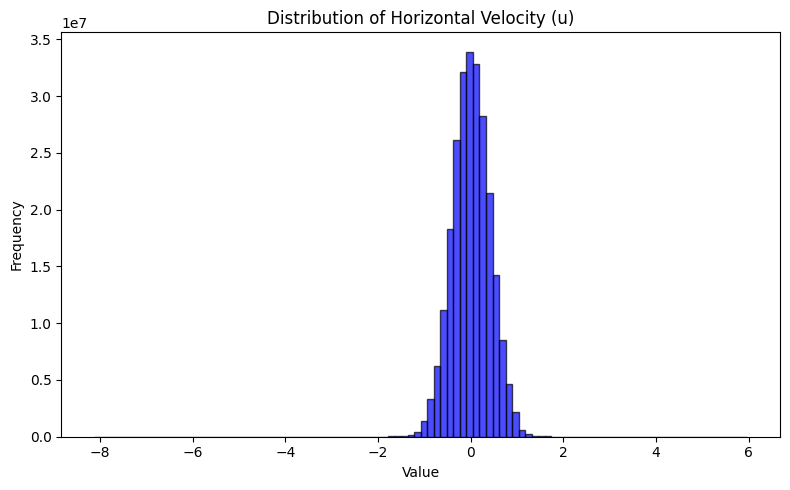

Done Horizontal Velocity (u)
Done 2


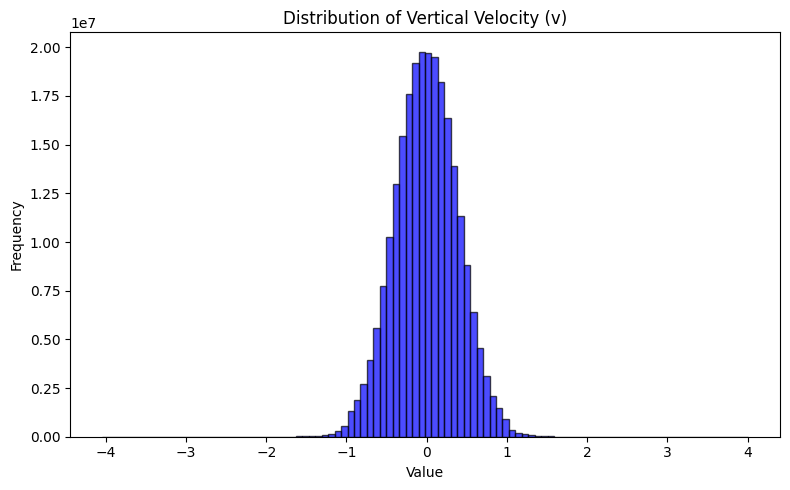

Done Vertical Velocity (v)
Done 3


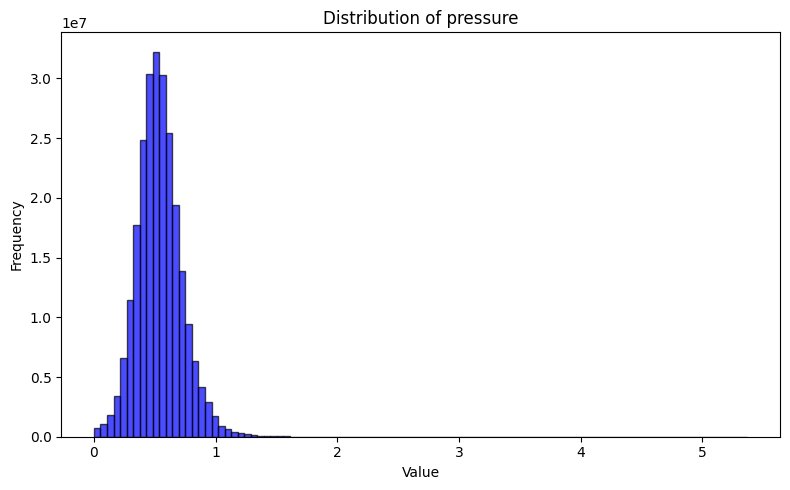

Done pressure
                             mean       std       min        max  \
density                  0.509334  0.303871  0.000410  16.128863   
Horizontal Velocity (u)  0.006927  0.401599 -8.129840   5.967370   
Vertical Velocity (v)   -0.004447  0.389012 -4.043660   4.002770   
pressure                 0.537157  0.183663  0.000033   5.370740   

                         25th_percentile    median  75th_percentile  
density                         0.304284  0.461706         0.651920  
Horizontal Velocity (u)        -0.262970  0.004568         0.277299  
Vertical Velocity (v)          -0.268050 -0.004595         0.259497  
pressure                        0.418063  0.525536         0.642480  


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Compute statistics for each channel
channel_names = ['density','Horizontal Velocity (u)', 'Vertical Velocity (v)', 'pressure']
stats = {}

for i, channel_name in enumerate(channel_names):
    channel_data = results[:, :, i, :, :].flatten()  # Flatten data for statistics
    channel_stats = {
        'mean': np.mean(channel_data),
        'std': np.std(channel_data),
        'min': np.min(channel_data),
        'max': np.max(channel_data),
        '25th_percentile': np.percentile(channel_data, 25),
        'median': np.median(channel_data),
        '75th_percentile': np.percentile(channel_data, 75)
    }
    stats[channel_name] = channel_stats
    print(f'Done {i}')

    # Plot histogram for the channel using matplotlib
    plt.figure(figsize=(8, 5))
    plt.hist(channel_data, bins=100, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {channel_name}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    print(f'Done {channel_name}')

# Display statistics
stats_df = pd.DataFrame(stats).T  # Transpose to view channels as rows
print(stats_df)
